In [1]:
import os
import sys

sys.path.append('..')

import pickle 
import torch 
import numpy
from utilities import overlap_top_tr, overlap_bulk_tr
import matplotlib.pyplot as plt
import wandb

Here I reproduce figure (2) from Gur-Ari et al. "GRADIENT DESCENT HAPPENS IN A TINY SUBSPACE" paper.

There top spaces calculated using the following script: 
```
python train.py --task projected_training \--epochs 1 \
--hidden_sizes 200 200 200 --activation 'tanh' \
--warm_up_epochs 0 \
--algo SGD \
--plot_losses \
--lr 0.01 \
--loss MSE \
--seed 42 --save_evecs \
--batch_size 100 \
--dataset MNIST_full      
```

In [2]:

path = "../../storage/seed_42/results_pickle"

with open(path, "rb") as file:
    results = pickle.load(file)

print(results['top_evecs'])

[(100, 'training', tensor([[ 2.9056e-11,  6.0181e-14, -6.6571e-11,  ..., -1.3570e-01,
          1.1766e-01,  7.4943e-02],
        [-5.1900e-11, -1.1956e-13,  1.2336e-10,  ...,  6.0909e-03,
         -1.7197e-01,  7.4133e-02],
        [-6.1688e-12, -1.1931e-14,  1.3559e-11,  ...,  2.0270e-02,
         -1.6531e-01,  2.4824e-02],
        ...,
        [-1.0967e-11, -2.6444e-14,  2.8065e-11,  ...,  2.3079e-01,
         -1.0438e-01, -1.1375e-01],
        [-7.7801e-12, -1.5581e-14,  1.8830e-11,  ...,  3.3590e-02,
         -4.8696e-02, -7.9614e-02],
        [ 8.8188e-12,  2.1497e-14, -1.7947e-11,  ...,  1.5121e-01,
          3.7265e-02, -1.4830e-01]])), (200, 'training', tensor([[ 4.7812e-11,  4.8443e-11,  1.2284e-10,  ...,  1.3242e-01,
         -1.0745e-01, -7.2999e-02],
        [-3.7206e-11, -3.5548e-11, -9.3528e-11,  ..., -1.7379e-02,
          1.6281e-01, -7.8022e-02],
        [-8.0752e-11, -7.6445e-11, -1.9527e-10,  ..., -1.4080e-02,
          1.6753e-01, -1.8752e-02],
        ...,
       

t1 = 100
t1 = 500
t1 = 1000
t1 = 1500


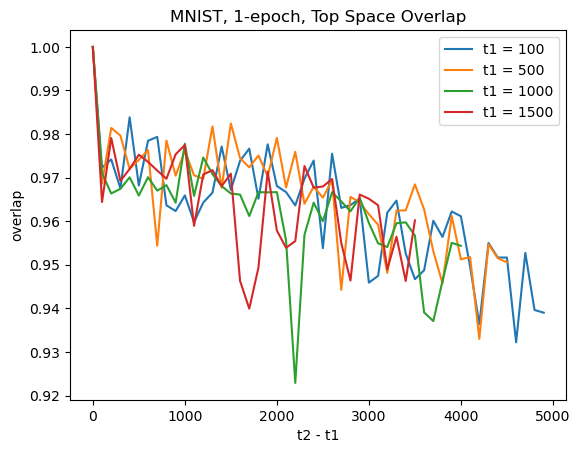

In [3]:
t1s = [100, 500, 1000, 1500]

for t1 in t1s:
    print(f't1 = {t1}')
    overlaps = []
    top_evecs1 = next(evecs for step, phase, evecs in results['top_evecs'] if step == t1)

    for (step, phase, evecs) in results['top_evecs']:
        if step < t1:
            continue
        overlaps.append((step - t1, float(overlap_top_tr(top_evecs1, evecs))))
    delta_t, overlaps = list(zip(*overlaps))    
    plt.plot(delta_t, overlaps, label = f"t1 = {t1}")

plt.legend()
plt.xlabel("t2 - t1")
plt.ylabel("overlap")
plt.title("MNIST, 1-epoch, Top Space Overlap")
plt.show()

t1 = 500
t1 = 1000
t1 = 1500
t1 = 2000


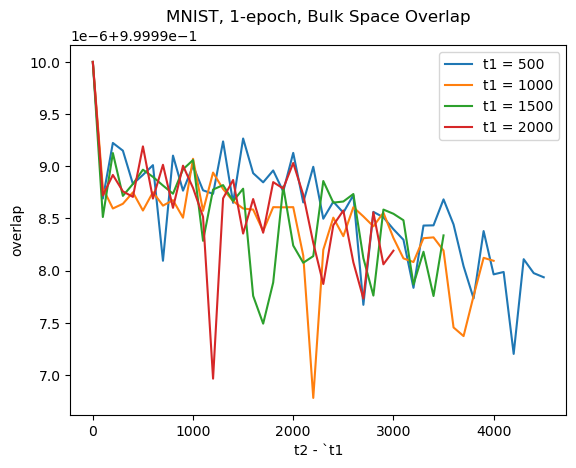

In [4]:
t1s = [500, 1000, 1500, 2000]

for t1 in t1s:
    print(f't1 = {t1}')
    overlaps = []
    top_evecs1 = next(evecs for step, phase, evecs in results['top_evecs'] if step == t1)

    for (step, phase, evecs) in results['top_evecs']:
        if step < t1:
            continue
        overlaps.append((step - t1, float(overlap_bulk_tr(top_evecs1, evecs))))
    delta_t, overlaps = list(zip(*overlaps))    
    # overlaps = [round(x, 2) for x in overlaps]
    plt.plot(delta_t, overlaps, label = f"t1 = {t1}")

plt.legend()
plt.xlabel("t2 - `t1")
plt.ylabel("overlap")
# plt.axhline(y = 0, xmin = 0., xmax = 60000.)
plt.title("MNIST, 1-epoch, Bulk Space Overlap")
plt.show()

# Do independent run top spaces overlap?

In [18]:
api = wandb.Api()
artifact = api.artifact('ETH-DL-Project/results:v17', type='dict')
target_directory = os.path.join("..", "..", "storage")
target_directory = os.path.join(target_directory, "seed_12345")
artifact.download(root=target_directory)

artifact = api.artifact('ETH-DL-Project/results:v16', type='dict')
target_directory = os.path.join("..", "..", "storage")
target_directory = os.path.join(target_directory, "seed_42")
artifact.download(root=target_directory)


wandb: Downloading large artifact results:v17, 456.66MB. 2 files... 
wandb:   2 of 2 files downloaded.  
Done. 0:0:1.9
wandb: Downloading large artifact results:v16, 456.66MB. 2 files... 
wandb:   2 of 2 files downloaded.  
Done. 0:0:20.5


'../../storage/seed_42'

In [22]:
path_seed_42 = "../../storage/seed_42/results_pickle"
path_seed_12435 = "../../storage/seed_12345/results_pickle"

with open(path_seed_42, "rb") as file:
    results_seed_42 = pickle.load(file)

with open(path_seed_12435, "rb") as file:
    results_seed_12345 = pickle.load(file)

print(len(results_seed_42['top_evecs']))
print(len(results_seed_12345['top_evecs']))

50
50


t1 = 100
t1 = 200
t1 = 300
t1 = 400


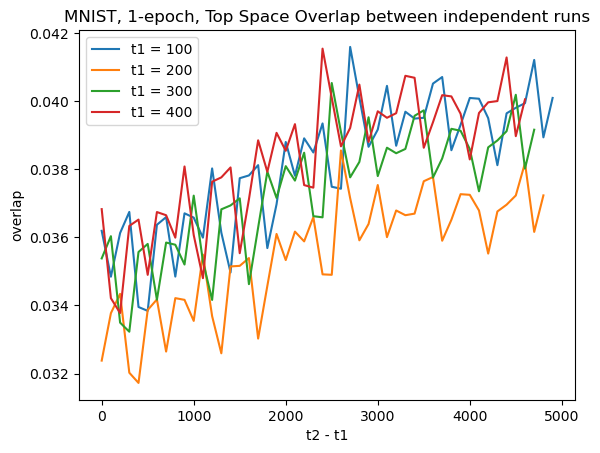

In [23]:
t1s = [100, 200, 300, 400]

for t1 in t1s:
    print(f't1 = {t1}')
    overlaps = []
    top_evecs1 = next(evecs for step, phase, evecs in results_seed_42['top_evecs'] if step == t1)

    for (step, phase, evecs) in results_seed_12345['top_evecs']:
        if step < t1:
            continue
        overlaps.append((step - t1, float(overlap_top_tr(top_evecs1, evecs))))
    delta_t, overlaps = list(zip(*overlaps))    
    plt.plot(delta_t, overlaps, label = f"t1 = {t1}")

plt.legend()
plt.xlabel("t2 - t1")
plt.ylabel("overlap")
plt.title("MNIST, 1-epoch, Top Space Overlap between independent runs")
plt.show()

t1 = 100
t1 = 200
t1 = 300
t1 = 400


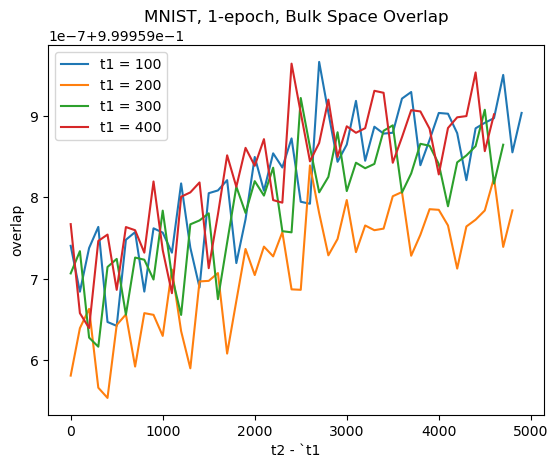

In [24]:
t1s = [100, 200, 300, 400]

for t1 in t1s:
    print(f't1 = {t1}')
    overlaps = []
    top_evecs1 = next(evecs for step, phase, evecs in results_seed_42['top_evecs'] if step == t1)

    for (step, phase, evecs) in results_seed_12345['top_evecs']:
        if step < t1:
            continue
        overlaps.append((step - t1, float(overlap_bulk_tr(top_evecs1, evecs))))
    delta_t, overlaps = list(zip(*overlaps))    
    # overlaps = [round(x, 2) for x in overlaps]
    plt.plot(delta_t, overlaps, label = f"t1 = {t1}")

plt.legend()
plt.xlabel("t2 - t1")
plt.ylabel("overlap")
# plt.axhline(y = 0, xmin = 0., xmax = 60000.)
plt.title("MNIST, 1-epoch, Bulk Space Overlap")
plt.show()